In [4]:
!pip install -q -r requirements.txt

# Boosting Method: XGBoost


### 1. import Libraries


In [12]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import Dataset

In [7]:
df = pd.read_csv('../data/processed/TelcoCustomerChurnPredictionFeatureScaled.csv')

In [8]:
X = X = df.drop(columns=["Churn"])
Y = df["Churn"].map({"Yes" : 1, "No": 0})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [11]:
xgb_clf = XGBClassifier(
    objective="binary:logistic", 
    eval_metric="logloss", 
    random_state=42
)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

Accuracy: 0.78708303761533
Precision: 0.6209150326797386
Recall: 0.5080213903743316
F1 Score: 0.5588235294117647

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[919 116]
 [184 190]]


Text(50.722222222222214, 0.5, 'Actual')

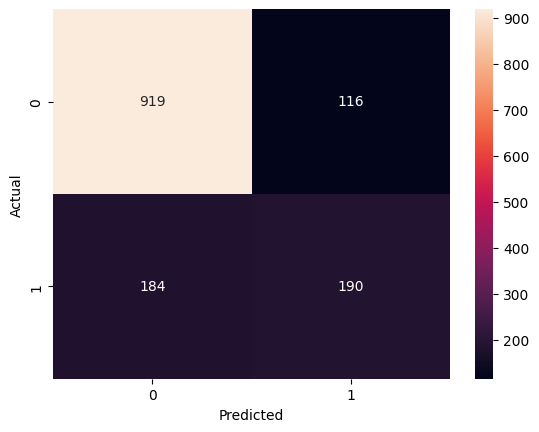

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

Hyperparameter Tuning

In [14]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(objective="binary:logistic", eval_metric="logloss"),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Score: 0.5930952541299476


Accuracy: 0.8090844570617459
Precision: 0.6804123711340206
Recall: 0.5294117647058824
F1 Score: 0.5954887218045113

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
 [[942  93]
 [176 198]]


Text(50.722222222222214, 0.5, 'Actual')

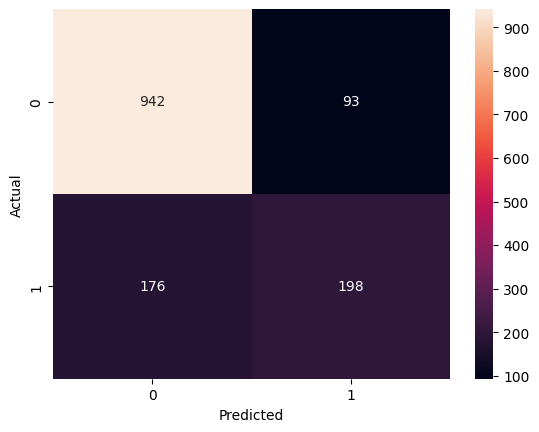

In [15]:
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

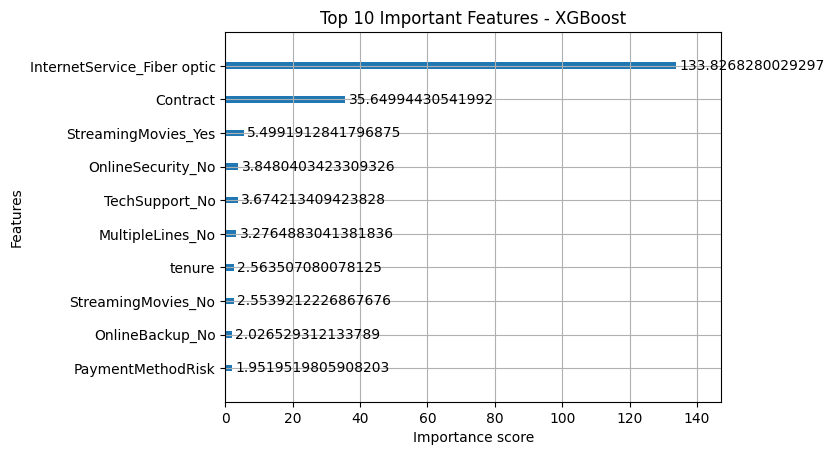

In [18]:
xgb.plot_importance(xgb_clf, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features - XGBoost")
plt.show()